### Importing all the necessary libraries for data processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the unprocessed dataset

In [2]:
death_rec = pd.read_csv("/Users/aakashdeorukhkar/Desktop/MSIS/Project Management/COVID_19 Datasets/covid_de.csv")

In [3]:
death_rec.head()


,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


View all the columns in the dataset

In [4]:
death_rec.columns

Index(['state', 'county', 'age_group', 'gender', 'date', 'cases', 'deaths',
       'recovered'],
      dtype='object')

Getting to know the dataset better with Describe() and Info()

In [5]:
death_rec.describe()

,cases,deaths,recovered
count,1.202328e+06,1.202328e+06,1.202328e+06
mean,4.479205e+00,8.244256e-02,3.866867e+00
std,7.072767e+00,4.094498e-01,5.824677e+00
min,0.000000e+00,0.000000e+00,-1.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+00
50%,2.000000e+00,0.000000e+00,2.000000e+00
75%,5.000000e+00,0.000000e+00,4.000000e+00
max,6.160000e+02,2.100000e+01,1.680000e+02


In [6]:
death_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202328 entries, 0 to 1202327
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   state      1202328 non-null  object
 1   county     1202328 non-null  object
 2   age_group  1199728 non-null  object
 3   gender     1180761 non-null  object
 4   date       1202328 non-null  object
 5   cases      1202328 non-null  int64 
 6   deaths     1202328 non-null  int64 
 7   recovered  1202328 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 73.4+ MB


Checking for Null data

In [7]:
death_rec.isna().sum()

state            0
county           0
age_group     2600
gender       21567
date             0
cases            0
deaths           0
recovered        0
dtype: int64

Copying the dataset so we do not make any changes to the original dataset

In [8]:
de = death_rec.copy()

In [9]:
de

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1
...,...,...,...,...,...,...,...,...
1202323,Thueringen,SK Weimar,NaN,M,2021-11-12,1,0,0
1202324,Thueringen,SK Weimar,NaN,M,2021-11-15,1,0,0
1202325,Thueringen,SK Weimar,NaN,M,2021-11-16,1,0,0
1202326,Thueringen,SK Weimar,NaN,M,2021-11-17,1,0,0


In [10]:
de.isna().sum()


state            0
county           0
age_group     2600
gender       21567
date             0
cases            0
deaths           0
recovered        0
dtype: int64

Checking how many unique values exist in each column 

In [11]:
de.nunique()

state         16
county       411
age_group      6
gender         2
date         652
cases        215
deaths        21
recovered    143
dtype: int64

Creating a countplot of age-group

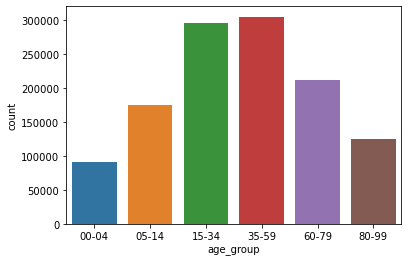

In [12]:
sns.countplot(x = de["age_group"])
plt.show()

Filling all the null values up with the highest repeated values i.e 35-59

In [13]:
de["age_group"] = de["age_group"].fillna(de["age_group"].value_counts().index[0])  

In [14]:
de.isna().sum()

state            0
county           0
age_group        0
gender       21567
date             0
cases            0
deaths           0
recovered        0
dtype: int64

In [15]:
de.age_group.unique()

array(['00-04', '05-14', '15-34', '35-59', '60-79', '80-99'], dtype=object)

In [ ]:
Filling all the NA values from gender with U standing for Unknown 

In [16]:
de["gender"] = de["gender"].fillna("U")

In [17]:
de.isna().sum()

state        0
county       0
age_group    0
gender       0
date         0
cases        0
deaths       0
recovered    0
dtype: int64

In [18]:
#de.to_csv("clean_death_recovered.csv")

### Demographic file is clean now


In [19]:
de.shape

(1202328, 8)

In [20]:
de.cases.max()

616

In [21]:
de.deaths.max()

21

In [22]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202328 entries, 0 to 1202327
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   state      1202328 non-null  object
 1   county     1202328 non-null  object
 2   age_group  1202328 non-null  object
 3   gender     1202328 non-null  object
 4   date       1202328 non-null  object
 5   cases      1202328 non-null  int64 
 6   deaths     1202328 non-null  int64 
 7   recovered  1202328 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 73.4+ MB


In [23]:
de.cases

0          1
1          1
2          1
3          1
4          1
          ..
1202323    1
1202324    1
1202325    1
1202326    1
1202327    1
Name: cases, Length: 1202328, dtype: int64

In [24]:
death_rec.cases.max()


616

In [25]:
de.describe()

,cases,deaths,recovered
count,1.202328e+06,1.202328e+06,1.202328e+06
mean,4.479205e+00,8.244256e-02,3.866867e+00
std,7.072767e+00,4.094498e-01,5.824677e+00
min,0.000000e+00,0.000000e+00,-1.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+00
50%,2.000000e+00,0.000000e+00,2.000000e+00
75%,5.000000e+00,0.000000e+00,4.000000e+00
max,6.160000e+02,2.100000e+01,1.680000e+02


In [27]:
de.cases.unique()

array([  1,   3,   2,   5,   4,   7,   8,   6,   9,  10,  17,  12,  13,
        18,  15,  27,  11,  16,  24,  22,  23,  20,  21,  36,  32,  14,
        19,  42,  28,  26,  29,  34,  45,  30,  39,  33,  61,  31,  38,
        25,  35,  43,  50,  51,  44,  60,  53,  46,  74,  37,  59,  69,
        40,  49,  41,  58,  54,  71,  47,  62,  72,  67,  48,  56,  52,
        78,  79,  55,  64,  85,  75,  65,  66, 102, 104,  81,  57,  70,
        86,  63,  68,  80,  73,  88,  76,  92,  87,  91, 100,  94, 151,
       162,  84,  90, 107,  83,  77,  99,  89,  82,   0, 127, 116, 114,
       124, 119, 106, 111,  97, 115, 121, 238, 122, 110, 169, 247,  93,
       125, 129, 142,  96, 132, 202, 228, 190, 214, 196, 384, 547, 273,
       182, 112,  98, 139, 131, 165, 143, 178, 233, 177, 219, 217, 534,
       255, 108, 117, 109,  95, 103, 101, 105, 155, 126, 128, 136, 137,
       150, 193, 212, 218, 223, 236, 424, 607, 245, 220, 123, 120, 118,
       171, 149, 144, 215, 221, 226, 396, 616, 261, 205, 153, 11

In [28]:
de.deaths.unique()

array([ 0,  1,  5,  2,  4,  3,  7,  6,  8, 10, 11,  9, 12, 13, 17, 21, 16,
       14, 15, 20, 18])

In [29]:
de.date.unique()

array(['2020-03-27', '2020-03-28', '2020-04-03', '2020-10-18',
       '2020-10-22', '2020-10-27', '2020-10-30', '2020-11-03',
       '2020-11-07', '2020-11-10', '2020-11-15', '2020-11-17',
       '2020-11-18', '2020-11-19', '2020-11-25', '2020-12-05',
       '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-19',
       '2020-12-21', '2020-12-29', '2020-12-30', '2021-01-24',
       '2021-01-30', '2021-02-06', '2021-02-12', '2021-02-18',
       '2021-02-26', '2021-03-04', '2021-03-07', '2021-03-09',
       '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-14',
       '2021-03-18', '2021-03-26', '2021-03-30', '2021-04-07',
       '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-12',
       '2021-04-15', '2021-04-16', '2021-04-20', '2021-04-24',
       '2021-04-25', '2021-04-27', '2021-04-28', '2021-04-29',
       '2021-05-01', '2021-05-02', '2021-05-04', '2021-05-11',
       '2021-05-13', '2021-05-18', '2021-05-28', '2021-05-31',
       '2021-06-01', '2021-06-06', '2021-06-13', '2021-

In [30]:
de.cases.sum()

5385473

In [31]:
de.deaths.sum()

99123

In [32]:
de.recovered.sum()

4649242

In [33]:
de.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


In [34]:
de.columns


Index(['state', 'county', 'age_group', 'gender', 'date', 'cases', 'deaths',
       'recovered'],
      dtype='object')

In [46]:
de["date"].unique()

array(['2020-03-27', '2020-03-28', '2020-04-03', '2020-10-18',
       '2020-10-22', '2020-10-27', '2020-10-30', '2020-11-03',
       '2020-11-07', '2020-11-10', '2020-11-15', '2020-11-17',
       '2020-11-18', '2020-11-19', '2020-11-25', '2020-12-05',
       '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-19',
       '2020-12-21', '2020-12-29', '2020-12-30', '2021-01-24',
       '2021-01-30', '2021-02-06', '2021-02-12', '2021-02-18',
       '2021-02-26', '2021-03-04', '2021-03-07', '2021-03-09',
       '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-14',
       '2021-03-18', '2021-03-26', '2021-03-30', '2021-04-07',
       '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-12',
       '2021-04-15', '2021-04-16', '2021-04-20', '2021-04-24',
       '2021-04-25', '2021-04-27', '2021-04-28', '2021-04-29',
       '2021-05-01', '2021-05-02', '2021-05-04', '2021-05-11',
       '2021-05-13', '2021-05-18', '2021-05-28', '2021-05-31',
       '2021-06-01', '2021-06-06', '2021-06-13', '2021-

In [47]:
test = de.copy()

In [54]:
test.columns

Index(['state', 'county', 'age_group', 'gender', 'date', 'cases', 'deaths',
       'recovered'],
      dtype='object')

## Grouping the dataset by columns and aggregating the numeric values

In [101]:
summary = test.groupby(["date","state","county"]).agg({"cases":"sum","deaths":"sum","recovered":"sum"}).reset_index()
#sum = df.groupby(["year", "month"]).agg({"score": "sum", "num_attempts": "sum"}).reset_index()

In [105]:
summary.county.nunique()

411

In [108]:
summary.cases.sum()

5385473

In [109]:
summary

,date,state,county,cases,deaths,recovered
0,2020-01-02,Nordrhein-Westfalen,LK Maerkischer Kreis,1,0,1
1,2020-01-23,Saarland,LK Stadtverband Saarbruecken,1,0,1
2,2020-01-28,Bayern,LK Landsberg a.Lech,1,0,1
3,2020-01-28,Bayern,LK Starnberg,1,0,1
4,2020-01-29,Bayern,LK Fuerstenfeldbruck,1,0,1
...,...,...,...,...,...,...
199756,2021-11-21,Thueringen,LK Unstrut-Hainich-Kreis,84,0,0
199757,2021-11-21,Thueringen,LK Wartburgkreis,41,0,0
199758,2021-11-21,Thueringen,LK Weimarer Land,72,0,0
199759,2021-11-21,Thueringen,SK Jena,114,0,0


Finally saving the clean data as csv

In [110]:
summary.to_csv("date_grouped.csv")